In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # heard cotext length?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
# X
# Y
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
# let us create embeddings lookup table
C = torch.randn((27, 2))

In [10]:
C[5]

tensor([-1.6882, -0.0698])

In [11]:
# let us take something from previous notebook i.e. character_llm
# if we do one hot encoding.
# So basically we can directly index at '5'
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.6882, -0.0698])

In [12]:
# We can either think of it as the integer indexing into a lookup table C
# Equivalently we can think it as first layer of bigger neural network
# Hint: see we just did a matrix multiplication above
# But it has no non-linearity and
# the weight matrix is C
# we one hot the inputs and feed the this neural net first and this embeds them

In [13]:
# indexing '5' is easy. We can simply index at 5 as shown above
# but we need to simultaneously embed all [32, 3] (X.shape)
# pytorch can help us here
# this is 1D. [32, 3] is 2D
C[[5, 6, 7]]

tensor([[-1.6882, -0.0698],
        [-0.9089, -1.3089],
        [ 0.6793,  0.5912]])

In [14]:
# little pytorch trick
C[X].shape

torch.Size([32, 3, 2])

In [15]:
# example
X[13, 2]

tensor(1)

In [16]:
C[X][13, 2]

tensor([-0.1966, -0.3407])

In [17]:
C[1]

tensor([-0.1966, -0.3407])

In [18]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [19]:
W1 = torch.randn((6, 100)) # 6 because 3 * 2 from embedding shape
b1 = torch.randn(100)

# we can not simply emb @ W1 because shape is not same
# we need to concatenate so that we have [32, 6]

In [20]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [21]:
# we basically want 0, 1, 2
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [22]:
torch.unbind(emb, 1)[0].shape

torch.Size([32, 2])

In [24]:
len(torch.unbind(emb, 1))

3

In [25]:
torch.cat(torch.unbind(emb, 1), 1).shape # cat will create new memory and new tensors

torch.Size([32, 6])

In [26]:
# this is one way to do it
# we can do better
a = torch.arange(18)

In [27]:
a.shape

torch.Size([18])

In [31]:
# a.view(9, 2)
# a.view(2, 9)
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [32]:
# .view is very efficient
# in each tensor we have underlying storage
# storage is just one-dimensional vector
# when we call view, we manipulate some attributes that dictate
# how this sequence is interpreted.
# BUT it is not moved, copied, extended, deleted etc

In [34]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [37]:
# h = emb.view(32, 6) @ W1 + b1
# care about broadcasting '+' here. Read the docs
h = emb.view(emb.shape[0], 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [38]:
h = torch.tanh(h)
h.shape

torch.Size([32, 100])

In [39]:
h

tensor([[ 0.1083,  0.9295, -0.9845,  ...,  0.0195,  0.9743, -0.6886],
        [ 0.6601,  0.9979, -0.8292,  ...,  0.9981,  0.6974,  0.8205],
        [-0.3553, -0.6000, -0.9997,  ..., -0.9992,  0.9964, -0.9991],
        ...,
        [-0.9680,  0.9997, -0.8424,  ...,  0.9900,  0.9999,  0.9331],
        [-0.0593, -0.9716, -0.9686,  ..., -1.0000, -0.8790, -0.9956],
        [ 0.3729,  0.3755, -0.8379,  ...,  0.8823, -0.9769, -0.8639]])

In [40]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [41]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [43]:
counts = logits.exp()

In [44]:
prob = counts / counts.sum(1, keepdims=True)

In [45]:
prob.shape

torch.Size([32, 27])

In [46]:
prob[0].sum()

tensor(1.)

In [48]:
prob[torch.arange(32), Y]

tensor([2.2684e-07, 4.0685e-10, 4.3028e-15, 1.0306e-08, 7.5497e-01, 2.2948e-12,
        1.6408e-13, 4.5986e-11, 5.2164e-08, 9.6095e-06, 6.8127e-06, 2.7357e-20,
        7.0481e-05, 6.2294e-08, 2.4091e-05, 1.4941e-05, 8.2367e-11, 4.7906e-12,
        6.6535e-07, 8.3512e-08, 1.0281e-03, 3.0990e-12, 2.8499e-12, 1.4287e-07,
        1.8022e-09, 2.1445e-06, 9.1335e-11, 1.6366e-09, 4.8460e-05, 5.2575e-10,
        1.0431e-09, 3.5576e-05])

In [49]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.6302)

In [50]:
# bringing some of the things together to glance where we are

# Our dataset are X, Y

C = torch.randn((27, 2)) # this is embedding lookup
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [51]:
sum(p.nelement() for p in parameters)

3481

In [52]:
emb = C[X]
h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.6498, grad_fn=<NegBackward0>)

In [53]:
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
# these lines are basically cross entropy
F.cross_entropy(logits, Y)

tensor(19.6498, grad_fn=<NllLossBackward0>)

In [54]:
# forward pass
emb = C[X]
h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(19.6498, grad_fn=<NllLossBackward0>)

In [57]:
# why use inbuilt function?
# efficient: It will not create new tensors. It can create infused kernels etc
# It can also have better mathematical equations which makes compute faster
# our method will not behave very well numerically
# see example below. Remember exp() rises very fast with postive numbers

logits = torch.tensor([-1000, -3, 9, 1000])
# logits = torch.tensor([1, 3, -9, 1])
counts = logits.exp()
prob = counts / counts.sum()
prob

# one of the ways to solve it take to max number and subtract from tensor
# negatives are fine with exp

tensor([1.0651e-01, 7.8698e-01, 4.8354e-06, 1.0651e-01])

In [58]:
# backward pass
for p in parameters:
  p.grad = None
loss.backward()

# update
for p in parameters:
  p.data += -0.1 * p.grad

In [63]:
# let us bring it all together [the training algo]
# it will fit very well because we only have 32 example in 3k+ parameters
loop_count = 100
for i in range(loop_count):
  emb = C[X]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  if i % 10 == 0 or i == loop_count - 1:
    print(loss.item())

  for p in parameters:
    p.grad = None
  loss.backward()

  for p in parameters:
    p.data += -0.1 * p.grad

10.7156982421875
7.408116340637207
6.042463302612305
5.329652309417725
4.851751327514648
4.472996234893799
4.158266544342041
3.9013309478759766
3.6936497688293457
3.525590181350708
3.4055824279785156


In [82]:
# let us process full dataset and run it again
block_size = 3
X, Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [87]:
C = torch.randn((27, 2))
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [66]:
# the single loop is taking time and that is because we are running all examples
# forward and backward.
# We can optimise it
# We can batch the inputs (randomly selected)

torch.randint(0, X.shape[0], (32,))

tensor([182536, 127970, 173197, 146899, 159327, 154289,  54374, 159085, 214902,
         56658, 144723, 164658, 146419, 204279,  89805,  28238,  54288,  73070,
        177002, 176372,   2127, 166704, 147928, 185640,  95499, 219049, 113561,
         42337, 226756, 147218,   4260, 174684])

In [71]:
# let us batch now with size 32
loop_count = 10000
loss = 0
for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

2.45331072807312


In [72]:
# the above loss might look good and it is not
# it is only the loss for that batch
# let us how is it doing overall
emb = C[X]
h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4660, grad_fn=<NllLossBackward0>)

In [75]:
# one of the challenges is to identify our learning rate
# our we learning too slow or too fast
# we can run some loop_count with various step sizes
# to find a agreeable search space.
# In this case play with 0.000001, 0.0001, 0.001, 1, 10
# You will find that it is between 0.001 and 1
# we can create a linear rate space
# we can make it linear of exponential.
# we will make exponential here since linear is not very helpful

lre = torch.linspace(-3, 0, steps=1000)
lrs = 10**lre

# sample lrs
lrs[500:510]

tensor([0.0317, 0.0320, 0.0322, 0.0324, 0.0326, 0.0328, 0.0331, 0.0333, 0.0335,
        0.0338])

In [84]:
loop_count = 1000
loss = 0
loss_at_i = []
learning_rate_at_i = []
for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  #stats
  loss_at_i.append(loss.item())
  learning_rate_at_i.append(lre[i])
print(loss.item())

5.564041614532471


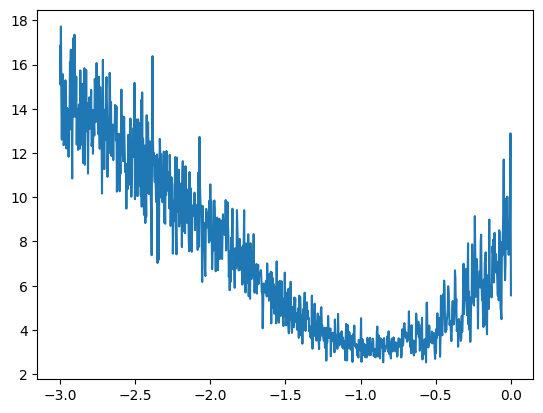

In [85]:
plt.plot(learning_rate_at_i, loss_at_i)

In [86]:
# with above graph we can narow down learning rate exp even more and we see
# 0.1 was fairly good learning based on data and not just hunch

In [88]:
loop_count = 1000000
loss = 0
for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

2.1992580890655518


In [ ]:
# now let us try same thing with learning rate decay
loop_count = 1000000
loss = 0
for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

print(loss.item())

In [89]:
# we actually want to see loss at dataset level
emb = C[X]
h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2202, grad_fn=<NllLossBackward0>)

In [ ]:
# the bigram loss was 2.45 almost
# we have already surpassed it
# this is good here but not always good
# think about overfitting
# we could make this million parameters and basically make net learn out datset
# we generally do training set, validation split, test split
# generally the split is 80%, 10%, 10%
# validation set is for hyper parameter optimisation
# you are not allowed to learn from test set
# experiment on dev split
# run on test set only once or as few times as possible at end of training

In [90]:
# build the dataset

def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random

random.shuffle(words)
n = int(0.8 * len(words))
n1 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n])
Xdev, Ydev = build_dataset(words[n:n1])
Xte, Yte = build_dataset(words[n1:])

torch.Size([182494, 3]) torch.Size([182494])
torch.Size([22833, 3]) torch.Size([22833])
torch.Size([22819, 3]) torch.Size([22819])


In [102]:
C = torch.randn((27, 2))
# W1 = torch.randn((6, 100))
# b1 = torch.randn(100)
# W2 = torch.randn((100, 27))
W1 = torch.randn((6, 300))
b1 = torch.randn(300)
W2 = torch.randn((300, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

10281

In [109]:
loop_count = 60000
loss = 0

loss_at_i = []
i_step = []
for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = emb.view(emb.shape[0], 6) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  loss_at_i.append(loss.item())
  i_step.append(i)

print(loss.item())

2.072544813156128


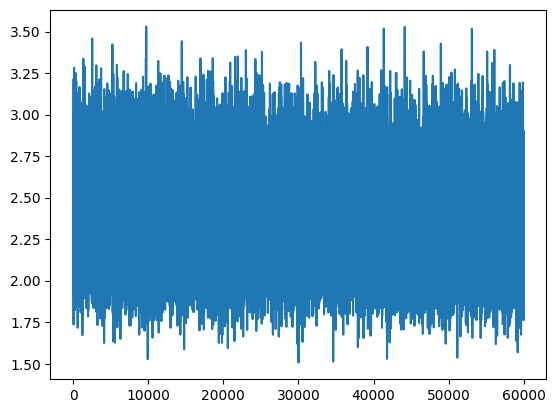

In [110]:
plt.plot(i_step, loss_at_i)

In [111]:
# let us use the dev set here
emb = C[Xdev]
h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3976, grad_fn=<NllLossBackward0>)

In [ ]:
# if you see training loss and dev loss to be equal
# this generally means underfitting; scale the networks

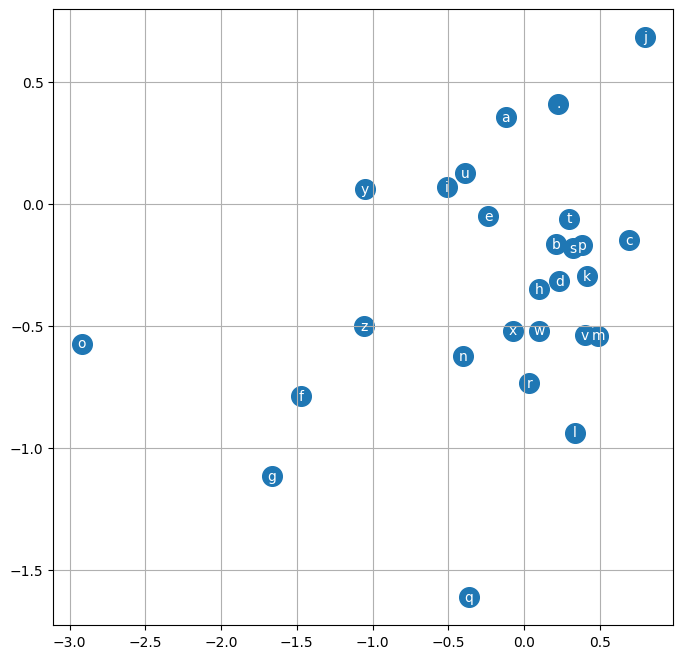

In [112]:
# look at patterns in graph; hint: clustering
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [136]:
# we increase the neurons in layer but still the loss didn't go down
# significantly
# It could be that we are trying to put too much information in embedding
# let us try to scale that

C = torch.randn((27, 10))
W1 = torch.randn((30, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

11897

In [137]:
loop_count = 200_000
loss = 0

loss_at_i = []
i_step = []

In [138]:
# for i in range(loop_count):
#   # mini batch
#   ix = torch.randint(0, Xtr.shape[0], (32,))

#   # forward pass
#   emb = C[Xtr[ix]]
#   h = emb.view(emb.shape[0], 30) @ W1 + b1
#   h = torch.tanh(h)
#   logits = h @ W2 + b2
#   loss = F.cross_entropy(logits, Ytr[ix])
#   # if i % 10 == 0 or i == loop_count - 1:
#   #   print(loss.item())

#   # backward pass
#   for p in parameters:
#     p.grad = None
#   loss.backward()

#   # update
#   lr = 0.1
#   for p in parameters:
#     p.data += -lr * p.grad

#   # track stats
#   loss_at_i.append(loss.log10().item())
#   i_step.append(i)

# print(loss.item())

for i in range(loop_count):
  # mini batch
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = emb.view(emb.shape[0], 30) @ W1 + b1
  h = torch.tanh(h)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # if i % 10 == 0 or i == loop_count - 1:
  #   print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1 if i < 100_000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  loss_at_i.append(loss.log10().item())
  i_step.append(i)

print(loss.item())

2.423798084259033


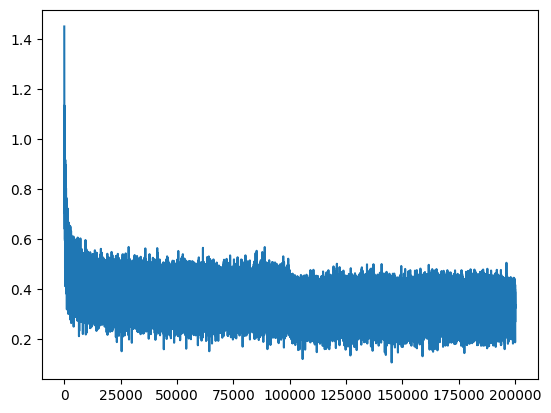

In [139]:
plt.plot(i_step, loss_at_i)

In [140]:
emb = C[Xtr]
h = emb.view(emb.shape[0], 30) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1330, grad_fn=<NllLossBackward0>)

In [141]:
emb = C[Xdev]
h = emb.view(emb.shape[0], 30) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1808, grad_fn=<NllLossBackward0>)

In [142]:
# play with batch size, model size, learning rate to get better loss

In [143]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

heaanue.
ojdy.
edian.
gifgan.
tan.
zayvin.
ahmoed.
cobaliyah.
ton.
ina.
audi.
arthana.
rham.
taheigaviyannesmel.
izzaraolizia.
ed.
jew.
ken.
martin.
asii.
